In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import folium
from shapely.geometry import Point
pd.options.display.max_columns = 25


In [2]:
provincias = gpd.read_file('data/lineas_limite.zip!SHP_ETRS89/recintos_provinciales_inspire_peninbal_etrs89')
#INSPIREID', 'COUNTRY', 'NATLEV', 'NATLEVNAME', 'NATCODE', 'NAMEUNIT', 'CODNUT1', 'CODNUT2', 'CODNUT3', 'geometry'
provincias = provincias.to_crs(crs=3395)
provincias['latitud'] = provincias.centroid.map(lambda p: p.y)


In [3]:
autopistas = gpd.read_file('data/RT_Espana_PorModos.zip!RT_VIARIA_CARRETERA/rt_tramo_vial.shp')
autopistas = autopistas.to_crs("+proj=cea EPSG:4326")
autopistas = autopistas.to_crs(crs=3395)

In [4]:
autopistas["nombre_alt"].unique()

array(['-997', '-', 'CORREDOR DEL CADAGUA', ...,
       'Zaragoza (J. E804/E90) <--> Zaragoza (J. E90/E7)',
       'Jn. A21/NA150 <--> Jaca',
       'Zaragoza airport<--<Zaragoza W (J. N-125/A-2)'], dtype=object)

In [5]:
autopistas["claseD"].unique()

array(['Carretera convencional', 'Carretera multicarril', 'Urbano',
       'Autovía o autopista li', 'Autopista de peaje', 'Camino', 'Senda',
       'Carril bici'], dtype=object)

In [6]:
autopistas = autopistas[(autopistas["claseD"] == "Autovía o autopista li") | (autopistas["claseD"] == "Autopista de peaje")]
peajes = autopistas[(autopistas["claseD"] == "Autopista de peaje")]
peajes["estadofisD"] = "Autopista de peaje"

autopistas = pd.concat([autopistas,peajes])

/home/nacho/Documents/MIARFID/PID/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [7]:
autopistas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 304621 entries, 580 to 1922993
Data columns (total 40 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_tramo    304621 non-null  int64   
 1   id_vial     304621 non-null  int64   
 2   codigo      304621 non-null  object  
 3   codigoD     304621 non-null  object  
 4   dgc_via     304621 non-null  int64   
 5   dgc_viaD    304621 non-null  object  
 6   tipo_vial   304621 non-null  int64   
 7   tipo_vialD  304621 non-null  object  
 8   clase       304621 non-null  int64   
 9   claseD      304621 non-null  object  
 10  nombre      304621 non-null  object  
 11  nombre_alt  304621 non-null  object  
 12  fuente_v    304621 non-null  int64   
 13  fuente_vD   304621 non-null  object  
 14  tipo_tramo  304621 non-null  int64   
 15  tipo_tramD  304621 non-null  object  
 16  calzada     304621 non-null  int64   
 17  calzadaD    304621 non-null  object  
 18  acceso      304621

In [8]:
def contains_any(nombre:str,lista):
    for ciudad in lista:
        if ciudad in nombre:
            return True
    return False

Text(0.5, 0.98, 'Autopistas y autovías de la península Española y Baleares')

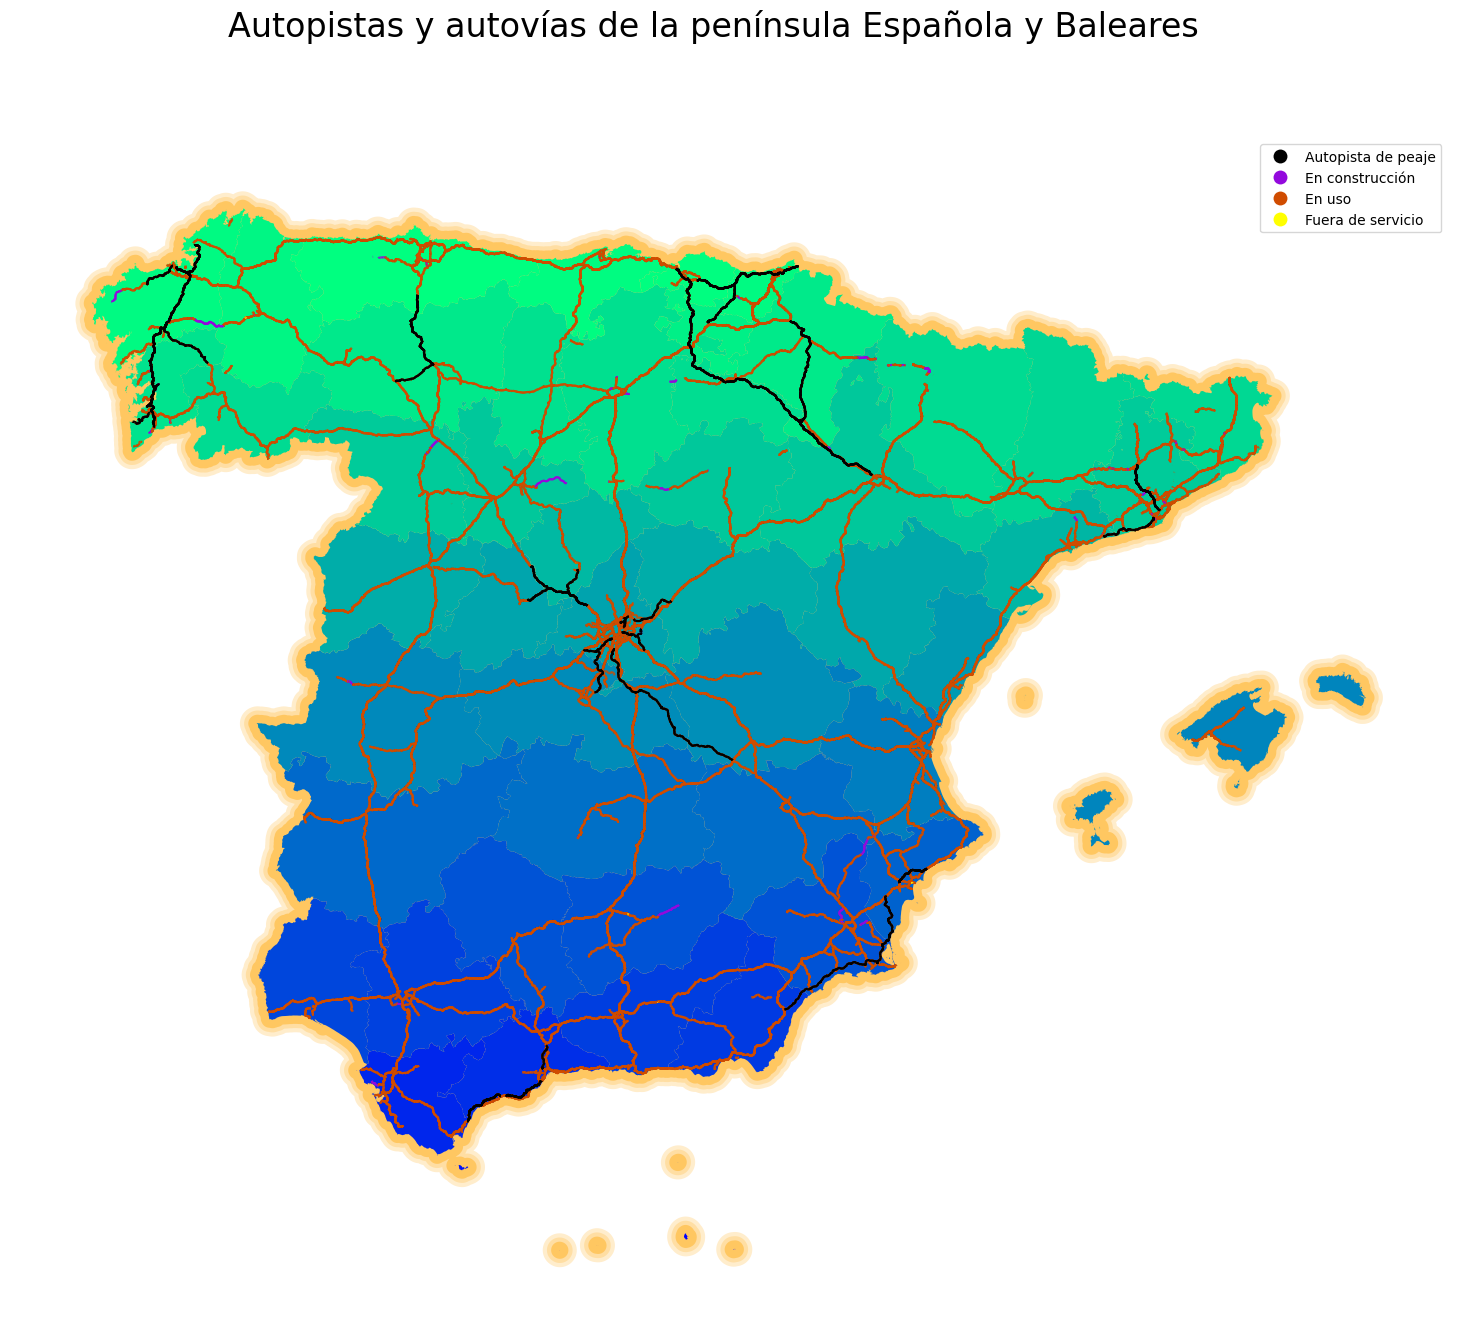

In [9]:

fig, (ax) = plt.subplots(ncols=1,figsize=(15,15))
ax = provincias.dissolve().buffer(20000).plot(ax = ax,figsize=(15,15),alpha=0.2,color="orange")
ax = provincias.dissolve().buffer(15000).plot(ax = ax,figsize=(15,15),alpha=0.2,color="orange")
ax = provincias.dissolve().buffer(10000).plot(ax = ax,figsize=(15,15),alpha=0.4,color="orange")
ax = provincias.plot(ax = ax, figsize=(15,15),cmap="winter",column="latitud")
autopistas[autopistas.centroid.y > 4000000].plot(ax = ax,linewidth=1.5,column="estadofisD",cmap="gnuplot",legend=True)
fig.tight_layout()
plt.axis("off")
fig.suptitle("Autopistas y autovías de la península Española y Baleares",fontsize=24)